In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import pickle
import os
import torch

In [2]:
%matplotlib inline

In [3]:
# Data frame paths
df_paths = "/bigstor/zsarwar/datasets/DF_Dogs_v_wolves_imagenet"
df_train = pd.read_pickle(os.path.join(df_paths, "df_train.pickle"))
df_test = pd.read_pickle(os.path.join(df_paths, "df_test.pickle"))

# Retrieval paths
ret_path = "/bigstor/zsarwar/Imagenet/Data_Sharing/Unicom_Retrievals/"
y_true = torch.load(os.path.join(ret_path, "query_label.t"))
y_pred = torch.load(os.path.join(ret_path, "pred_index.t"))
y_pred_labels = torch.load(os.path.join(ret_path, "pred_label.t"))

In [4]:
# Build a confusion matrix as well

In [35]:
top_k = 0
all_test_images = []
all_train_images = []
img_size = (256, 256)
for i in range(110):
    test_img = df_test.iloc[i]['img_path']
    test_img = Image.open(test_img)
    test_img = test_img.resize(img_size)
    test_img = np.asarray(test_img)
    all_test_images.append(test_img)
    t_train_images = []
    for j in range(top_k, top_k+10):
        train_idx = y_pred[j][i]
        train_img = df_train.iloc[train_idx]['img_path']
        train_img = Image.open(train_img)
        train_img = train_img.resize(img_size)
        train_img = np.asarray(train_img)
        t_train_images.append(train_img)
    all_train_images.append(t_train_images)


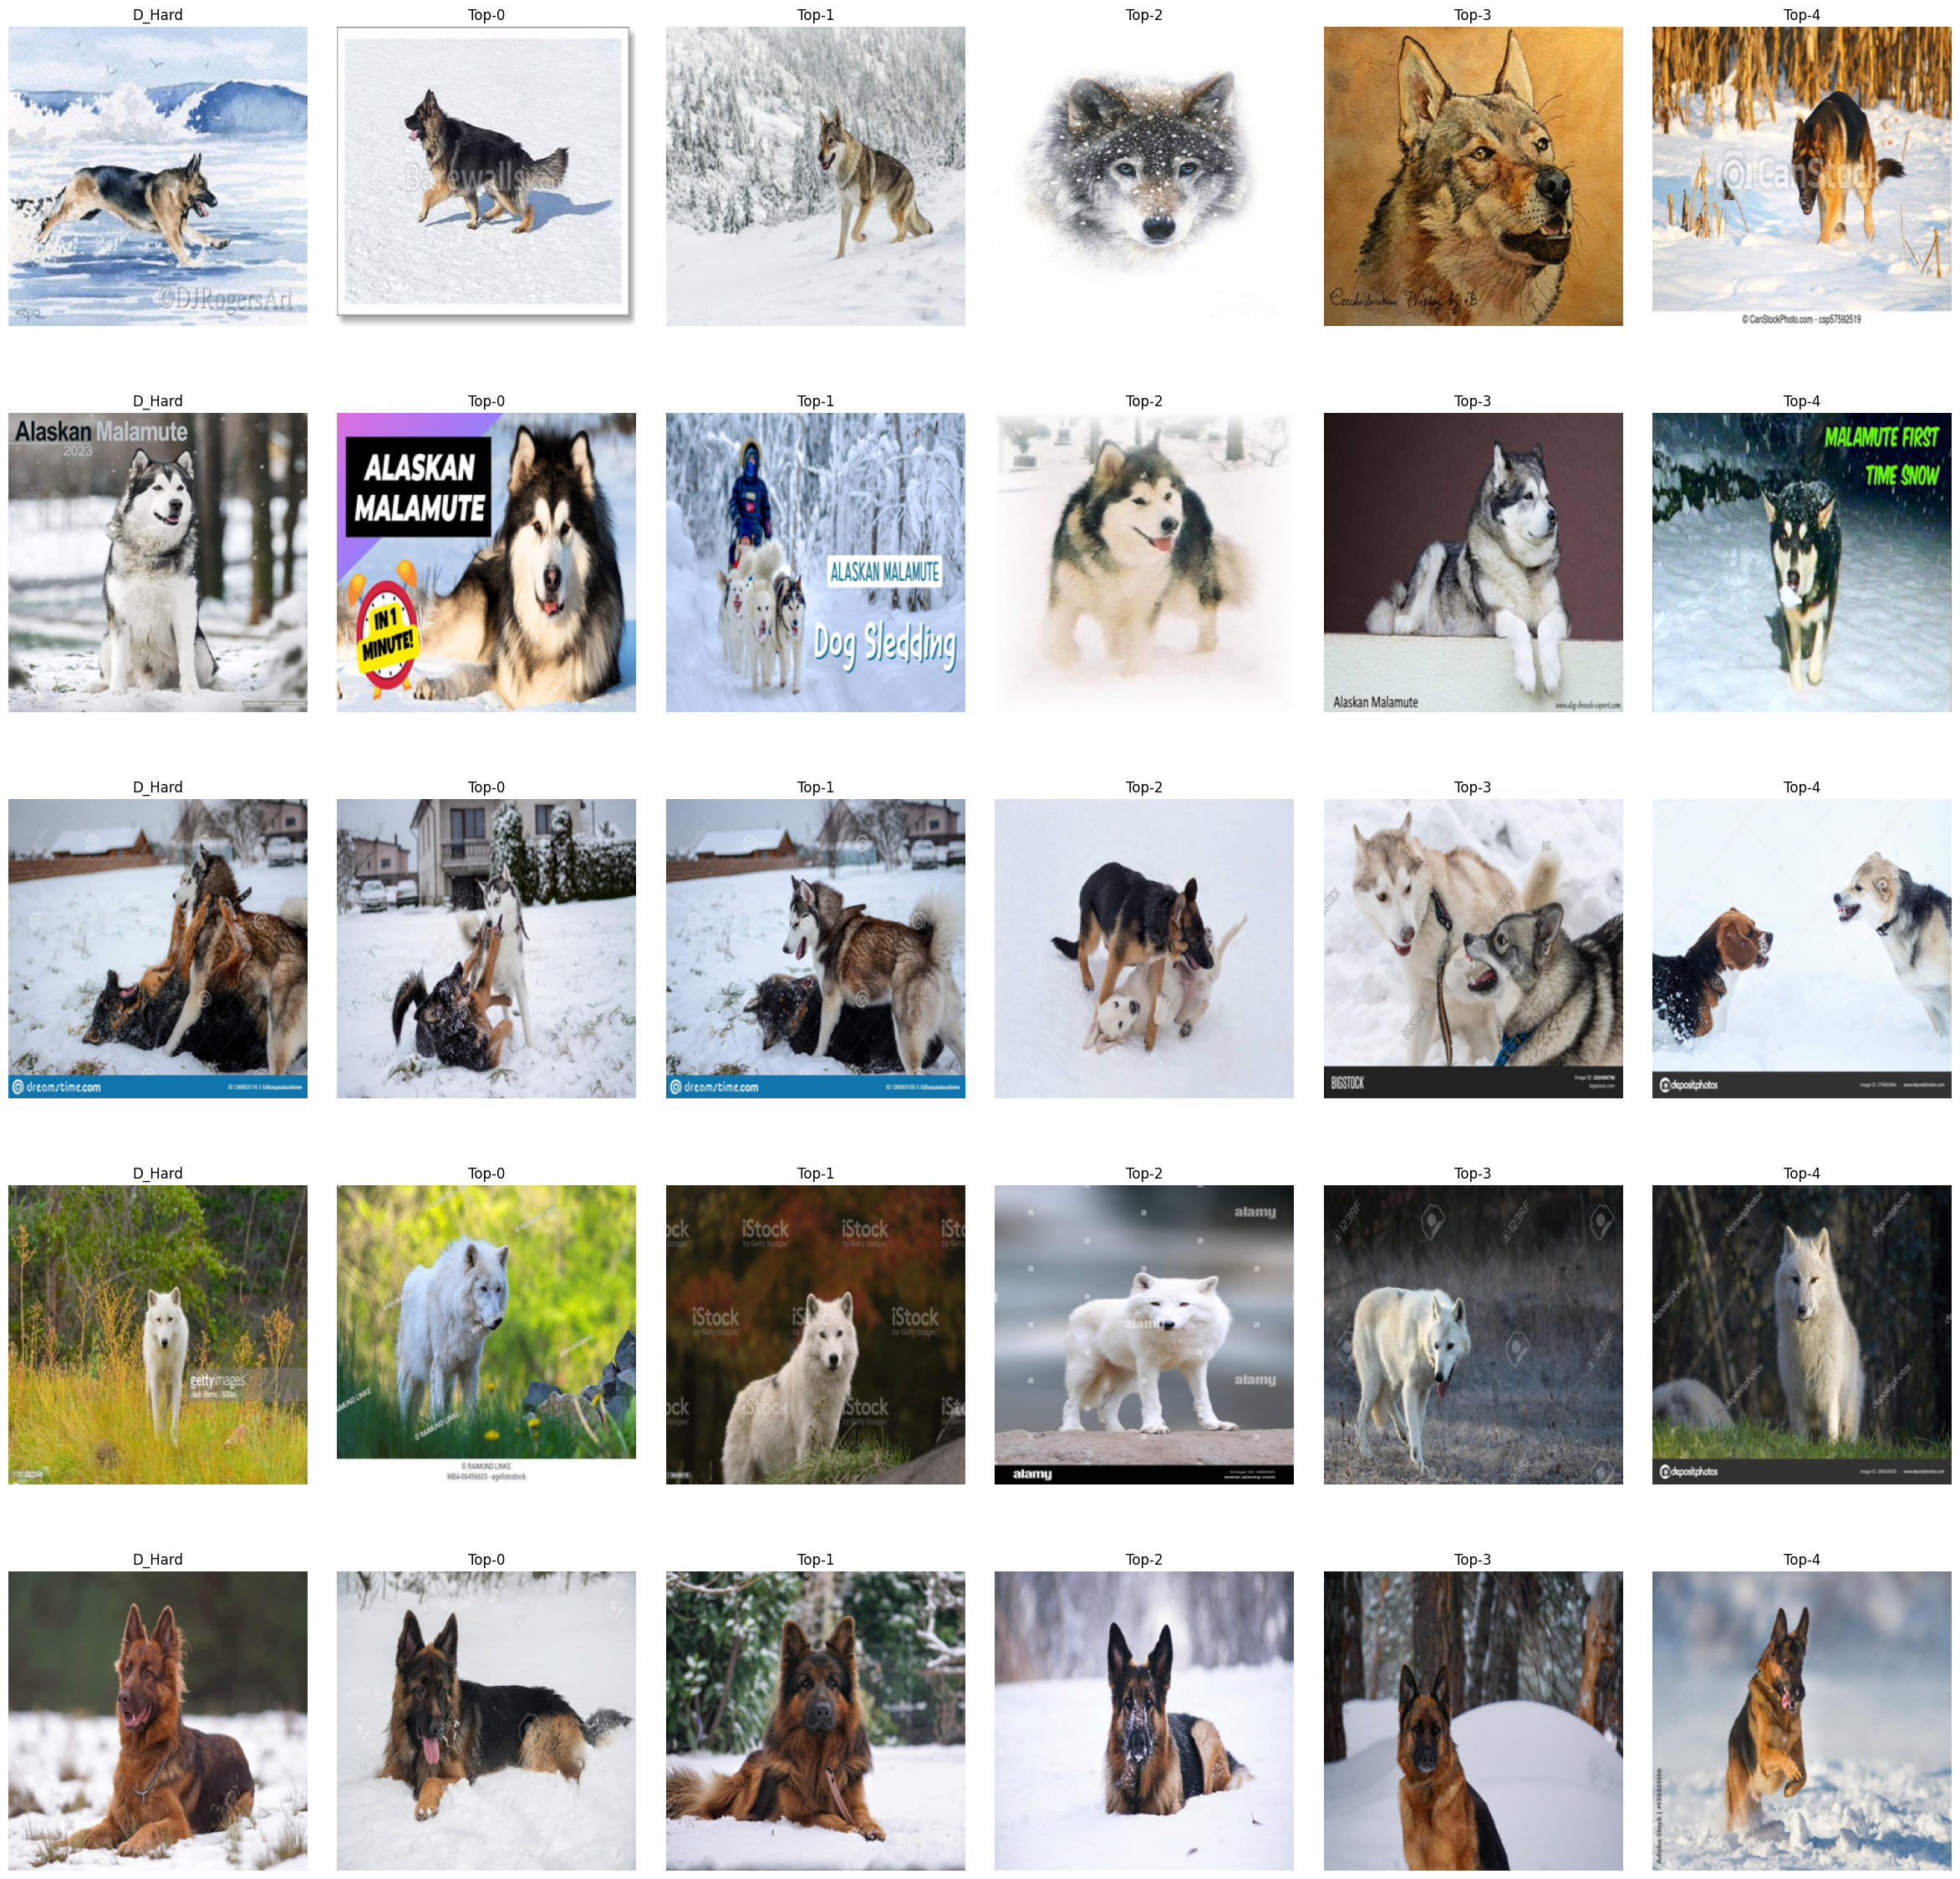

In [38]:
rows = 5
cols = 6

fig = plt.figure(figsize=(30, 30))
for i in range(rows):
    fig.add_subplot(rows, cols, i+1 + i*(cols-1))   
    plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.axis('off')
    plt.title("D_Hard")
    plt.imshow(all_test_images[i+95])
    for j in range(2, cols+1):
        fig.add_subplot(rows, cols, j + i*cols)
        plt.subplots_adjust(wspace=0.1, hspace=0)
        plt.axis('off')
        plt.title(f"Top-{top_k + (j-2)}")
        plt.imshow(all_train_images[i+95][j-2])

#save_path = "/bigstor/zsarwar/Imagenet/Data_Sharing/Unicom_Vis/Top-0-10_76-classes.jpg"
#plt.savefig(save_path, bbox_inches='tight')



In [31]:
t_idx = 2
y_true[:, t_idx]

array([79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79])

In [32]:
y_pred_labels[:, t_idx]

array([ 0,  0,  0,  0, 78,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0])